In [17]:
# Imports
import numpy as np
from pathlib import Path
import importlib 
import massimal.pipeline
import datetime
import matplotlib.pyplot as plt

In [18]:
dataset_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi')
# lcf_file_path = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi/0_raw/OlbergholmenS1-5/OlbergholmenS1_Pika_L_5.lcf')
# times_file_path = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi/0_raw/OlbergholmenS1-5/OlbergholmenS1_Pika_L_5.bil.times')
# radiance_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi/1_radiance')
# json_path = radiance_dir / (times_file_path.name.split('.')[0] + '.json')


In [19]:
importlib.reload(massimal.pipeline)
pipeline = massimal.pipeline.PipelineProcessor(dataset_dir)
imu_parser = massimal.pipeline.ImuDataParser()



12:34:44 INFO: File logging initialized.


In [20]:
lcf_data = imu_parser.read_lcf_file(pipeline.lcf_paths[0])
print(lcf_data)

{'time': array([0.00000000e+00, 5.00011444e-03, 9.99999046e-03, ...,
       1.99700000e+01, 1.99750001e+01, 1.99800000e+01]), 'roll': array([-0.00731233, -0.0072984 , -0.00725732, ..., -0.0061614 ,
       -0.00615078, -0.00615806]), 'pitch': array([-0.07024926, -0.07027676, -0.07029334, ..., -0.07434656,
       -0.07429259, -0.07422531]), 'yaw': array([-0.20383327, -0.20383637, -0.20385405, ..., -0.23737058,
       -0.23732199, -0.23738548]), 'longitude': array([10.13221032, 10.13221022, 10.13221013, ..., 10.13181287,
       10.13181276, 10.13181266]), 'latitude': array([59.0063765 , 59.00637667, 59.00637683, ..., 59.00700677,
       59.00700693, 59.00700709]), 'altitude': array([51.83150563, 51.83136828, 51.831231  , ..., 51.23666112,
       51.23585301, 51.23504122])}


In [21]:
times_data = imu_parser.read_times_file(pipeline.times_paths[0])
print(times_data)

[0.0000000e+00 1.0004000e-02 2.0005000e-02 ... 1.9970614e+01 1.9980615e+01
 1.9990615e+01]


In [22]:
lcf_data_interp = imu_parser.interpolate_lcf_to_times(lcf_data,times_data)

In [23]:
for element in lcf_data_interp.values():
    print(len(element) == 2000)

True
True
True
True
True
True
True


In [24]:
imu_parser.read_and_save_imu_data(pipeline.lcf_paths[0],pipeline.times_paths[0],pipeline.imu_data_paths[0])

In [31]:
imu_data = imu_parser.read_imu_json_file(pipeline.imu_data_paths[0])
print(imu_data)

{'time': [0.0, 0.01000400000003765, 0.02000500000002603, 0.030005000000016935, 0.04000500000000784, 0.05000599999999622, 0.06000600000004397, 0.07000600000003487, 0.08000700000002325, 0.09000700000001416, 0.10000700000000506, 0.11000699999999597, 0.12000800000004119, 0.1300080000000321, 0.140008000000023, 0.15000900000001138, 0.1600090000000023, 0.17000900000005004, 0.18001000000003842, 0.19001000000002932, 0.20001000000002023, 0.2100110000000086, 0.2200109999999995, 0.23001100000004726, 0.24001100000003817, 0.25001200000002655, 0.26001200000001745, 0.27001200000000836, 0.28001299999999674, 0.2900130000000445, 0.3000130000000354, 0.31001400000002377, 0.3200140000000147, 0.3300140000000056, 0.3400139999999965, 0.3500150000000417, 0.3600150000000326, 0.3700150000000235, 0.3800160000000119, 0.3900160000000028, 0.40001600000005055, 0.41001700000003893, 0.42001700000002984, 0.43001700000002074, 0.4400180000000091, 0.45001800000000003, 0.4600180000000478, 0.4700180000000387, 0.48001900000002

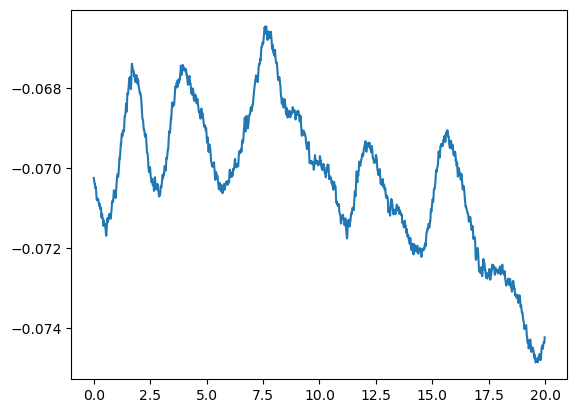

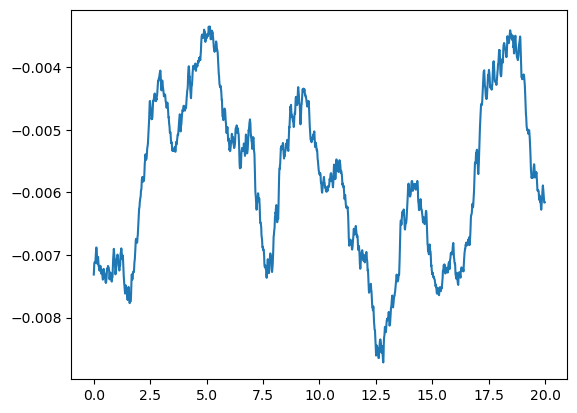

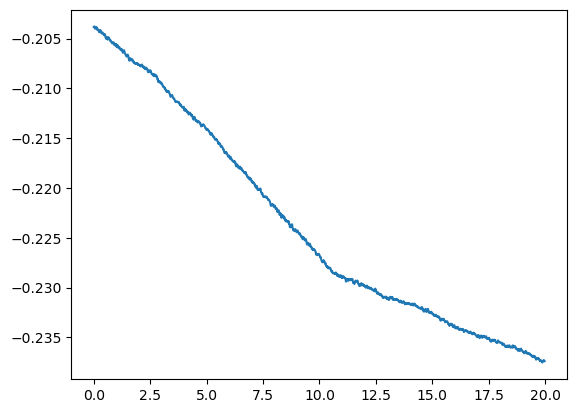

In [32]:
for rot_ax in ('pitch','roll','yaw'):
    plt.plot(imu_data['time'],imu_data[rot_ax])
    plt.show()

In [11]:
vec = np.array([3.0,4.0])

In [12]:
np.linalg.norm(vec)

5.0

In [14]:
np.tan(np.pi/4)

0.9999999999999999